# Aula 01

Exercício Com os dados do arquivo Admission_Predict.csv realize uma classificação dos alunos que possuem chance maior que 0.8 de admissão e dos que possuem chance menor que 0.8. Compare diversos modelos e determine qual seria o melhor a ser implementado. Agora inclusive o SVM.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, confusion_matrix

In [2]:
data = pd.read_csv("Admission_Predict.csv")

data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [3]:
data['target'] =  (data['Chance of Admit '] >= 0.8).astype(int)

data.drop(columns='Chance of Admit ',inplace=True)
data.drop(columns='Serial No.', inplace=True)
                        
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,target
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0
5,330,115,5,4.5,3.0,9.34,1,1
6,321,109,3,3.0,4.0,8.20,1,0
7,308,101,2,3.0,4.0,7.90,0,0
8,302,102,1,2.0,1.5,8.00,0,0
9,323,108,3,3.5,3.0,8.60,0,0



Modelo: Logistic Regression

Recall: 0.925

Precisão: 0.925


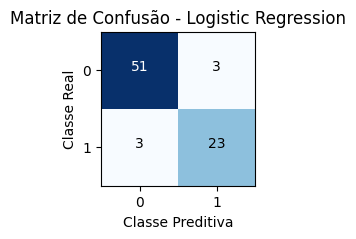


Modelo: Decision Tree

Recall: 0.825

Precisão: 0.825


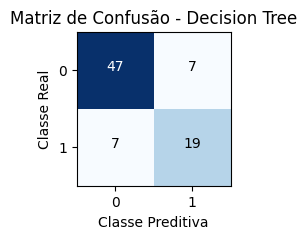


Modelo: Random Forest

Recall: 0.875

Precisão: 0.875


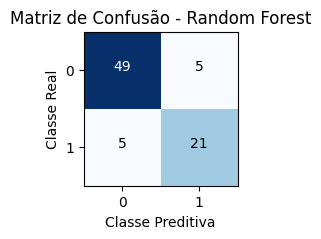


Modelo: SVM

Recall: 0.8875

Precisão: 0.8930527383367138


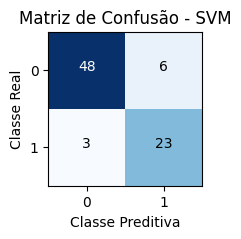

In [4]:
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

escalador = StandardScaler()
X_train = escalador.fit_transform(X_train)
X_test = escalador.transform(X_test)

modelos = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    
    print(f"\nModelo: {nome}")
    print(f"\nRecall: {recall}")
    print(f"\nPrecisão: {precision}")
    
    matriz_confusao = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(2, 2))
    plt.imshow(matriz_confusao,  cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusão - {nome}')

    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Classe Preditiva')
    plt.ylabel('Classe Real')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(matriz_confusao[i, j]), horizontalalignment="center", color="white" if matriz_confusao[i, j] > matriz_confusao.max() / 2 else "black")

    plt.show()

Como, para nós as metricas importantes em questão são `recall` e `precision` (pois é melhor que um aluno que tirou nota menor seja considerado aprovado do que o contrario) escolhemos o modelo de regressão logistica por apresentar os melhores valores para ambas metricas.